(np.float64(-0.5), np.float64(162.5), np.float64(110.5), np.float64(-0.5))

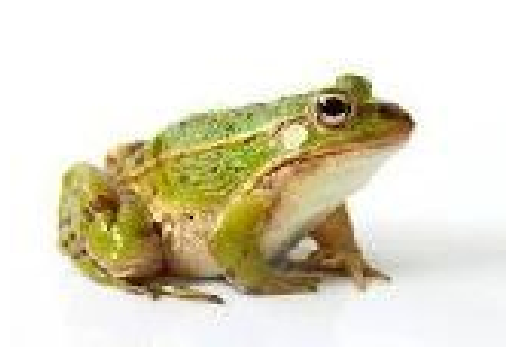

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("frog.jpeg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")

(np.float64(-0.5), np.float64(162.5), np.float64(110.5), np.float64(-0.5))

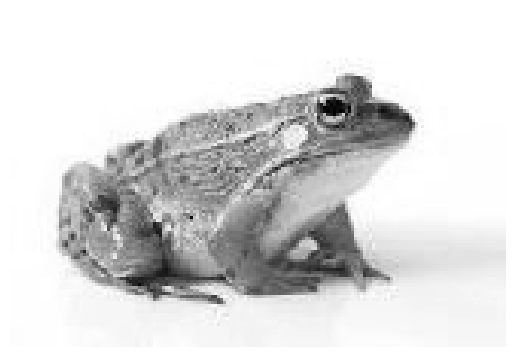

In [2]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap="gray")
plt.axis("off")

In [5]:
kx = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
], dtype=np.float32)

ky = kx.T

print(kx)
print('\n')
print(ky)

[[-1.  0.  1.]
 [-2.  0.  2.]
 [-1.  0.  1.]]


[[-1. -2. -1.]
 [ 0.  0.  0.]
 [ 1.  2.  1.]]


In [6]:
def convolve2d(image, kernel):
    h, w = image.shape
    kh, kw = kernel.shape
    pad_h, pad_w = kh // 2, kw // 2
    
    padded = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode="edge")
    output = np.zeros((h, w), dtype=np.float32)
    
    for i in range(h):
        for j in range(w):
            region = padded[i:i + kh, j:j+kw]
            output[i, j] = np.sum(region * kernel)
    
    return output

(np.float64(-0.5), np.float64(162.5), np.float64(110.5), np.float64(-0.5))

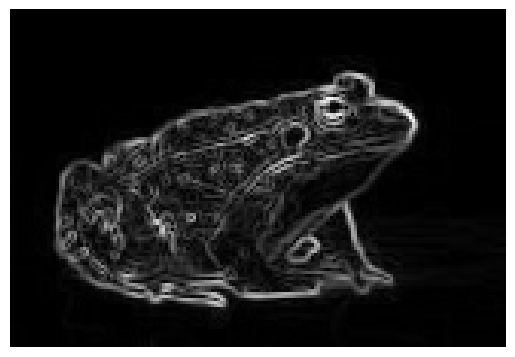

In [7]:
gx = convolve2d(gray, kx)
gy = convolve2d(gray, ky)

edges = np.sqrt(gx**2 + gy**2)
edges = edges / edges.max() * 255
edges = edges.astype(np.uint8)

plt.imshow(edges, cmap="gray")
plt.axis("off")